In [ ]:
!pip install nltk
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [ ]:
!pip -q install transformers

In [ ]:
import transformers
print(transformers.__version__)


4.41.2


In [ ]:
data = pd.read_csv('/content/sentimen_tayangan_tv.csv')

In [ ]:
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [ ]:
data.shape

(400, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data['Sentiment'] = lb.fit_transform(data['Sentiment'])
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...,...
395,396,0,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,0,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,0,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,0,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


In [ ]:
raw_data = data.copy()

#  Preprocessing

In [ ]:
import re
def text_preprocessing(text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'[-+]?[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  #text = text.script()
  return text


In [ ]:
print(data.columns)

Index(['Id', 'Sentiment', 'Acara TV', 'Jumlah Retweet', 'Text Tweet'], dtype='object')


In [ ]:
%time data['Text'] = data['Text Tweet'].apply(text_preprocessing)

CPU times: user 5.48 ms, sys: 68 µs, total: 5.55 ms
Wall time: 5.51 ms


In [ ]:
data.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,Text
0,1,1,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n_shanijkt ke hitamputih pemenang ssk j...
1,2,1,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...
2,3,1,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt pengharga...
3,4,1,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,1,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans


In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [76]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [77]:
print(df.columns)

Index(['Id', 'Sentiment', 'Text Tweet', 'cleaned_text', 'label',
       'Text Tweet_len', 'punct', 'token', 'stop', 'stemmed'],
      dtype='object')


In [78]:
df['token'] = df['cleaned_text'].apply(tokenize_text)
df.head()

,Id,Sentiment,Text Tweet,cleaned_text,label,Text Tweet_len,punct,token,stop,stemmed
0,1,1,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt ke hitamputih pemenang s...,0.0,100,3.0,"[undang, n, shanijkt, ke, hitamputih, pemenang...","['undang', 'n', 'shanijkt', 'hitamputih', 'pem...","['undang', 'n', 'shanijkt', 'hitamputih', 'men..."
1,2,1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,0.0,65,1.5,"[selamat, berbuka, puasa, semoga, amal, ibadah...","['selamat', 'berbuka', 'puasa', 'semoga', 'ama...","['selamat', 'buka', 'puasa', 'moga', 'amal', '..."
2,3,1,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,0.0,67,3.0,"[ada, nih, di, trans, hitam, putih, dia, dpt, ...","['nih', 'trans', 'hitam', 'putih', 'dpt', 'pen...","['nih', 'trans', 'hitam', 'putih', 'dpt', 'har..."
3,4,1,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih,0.0,38,2.6,"[selamat, ya, mas, adietaufan, masuk, hitamputih]","['selamat', 'mas', 'adietaufan', 'masuk', 'hit...","['selamat', 'mas', 'adietaufan', 'masuk', 'hit..."
4,5,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,0.0,29,0.0,"[asiknya, nonton, hitam, putih, trans]","['asiknya', 'nonton', 'hitam', 'putih', 'trans']","['asiknya', 'nonton', 'hitam', 'putih', 'trans']"


**Filtering(Stopword Removal)**

In [79]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [80]:
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [81]:
df['stop'] = df['token'].apply(stopword_text)
df.head()

,Id,Sentiment,Text Tweet,cleaned_text,label,Text Tweet_len,punct,token,stop,stemmed
0,1,1,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt ke hitamputih pemenang s...,0.0,100,3.0,"[undang, n, shanijkt, ke, hitamputih, pemenang...","[undang, n, shanijkt, hitamputih, pemenang, ss...","['undang', 'n', 'shanijkt', 'hitamputih', 'men..."
1,2,1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,0.0,65,1.5,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah...","['selamat', 'buka', 'puasa', 'moga', 'amal', '..."
2,3,1,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,0.0,67,3.0,"[ada, nih, di, trans, hitam, putih, dia, dpt, ...","[nih, trans, hitam, putih, dpt, penghargaan, n...","['nih', 'trans', 'hitam', 'putih', 'dpt', 'har..."
3,4,1,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih,0.0,38,2.6,"[selamat, ya, mas, adietaufan, masuk, hitamputih]","[selamat, mas, adietaufan, masuk, hitamputih]","['selamat', 'mas', 'adietaufan', 'masuk', 'hit..."
4,5,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,0.0,29,0.0,"[asiknya, nonton, hitam, putih, trans]","[asiknya, nonton, hitam, putih, trans]","['asiknya', 'nonton', 'hitam', 'putih', 'trans']"


**Stemming**

In [82]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [83]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [84]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,Id,Sentiment,Text Tweet,cleaned_text,label,Text Tweet_len,punct,token,stop,stemmed
0,1,1,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt ke hitamputih pemenang s...,0.0,100,3.0,"[undang, n, shanijkt, ke, hitamputih, pemenang...","[undang, n, shanijkt, hitamputih, pemenang, ss...","[undang, n, shanijkt, hitamputih, menang, ssk,..."
1,2,1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,0.0,65,1.5,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, buka, puasa, moga, amal, ibadah, har..."
2,3,1,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,0.0,67,3.0,"[ada, nih, di, trans, hitam, putih, dia, dpt, ...","[nih, trans, hitam, putih, dpt, penghargaan, n...","[nih, trans, hitam, putih, dpt, harga, norwegi..."
3,4,1,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih,0.0,38,2.6,"[selamat, ya, mas, adietaufan, masuk, hitamputih]","[selamat, mas, adietaufan, masuk, hitamputih]","[selamat, mas, adietaufan, masuk, hitamputih]"
4,5,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,0.0,29,0.0,"[asiknya, nonton, hitam, putih, trans]","[asiknya, nonton, hitam, putih, trans]","[asiknya, nonton, hitam, putih, trans]"


**Viz**

In [86]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [87]:
all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('kickandy', 71), ('mata', 63), ('najwa', 60), ('ilc', 58), ('yg', 54), ('ilctvone', 46), ('tv', 45), ('hitamputiht', 44), ('matanajwametrotv', 44), ('hitam', 40), ('putih', 39), ('orang', 39), ('acara', 37), ('metro', 37), ('trans', 30), ('keren', 30), ('pak', 30), ('nonton', 29), ('jadi', 29), ('ga', 28), ('indonesia', 21), ('ahok', 20), ('kickandymetrotv', 19), ('banget', 18), ('sama', 18), ('lihat', 17), ('inspirasi', 17), ('lebih', 16), ('malam', 16), ('banyak', 16), ('aja', 16), ('anak', 16), ('hitamputihtrans', 15), ('nya', 15), ('tdk', 15), ('undang', 14), ('apa', 14), ('hitamputih', 13), ('moga', 13), ('bukan', 13), ('http', 13), ('andy', 13), ('suka', 12), ('selalu', 12), ('makin', 12), ('sangat', 12), ('miris', 12), ('kok', 12), ('seru', 11), ('punya', 11), ('hidup', 11), ('jangan', 11), ('tvone', 11), ('liat', 10), ('baik', 10), ('buat', 10), ('kalau', 10), ('tp', 10), ('gak', 10), ('salut', 10), ('matanajwa', 10), ('kick', 10), ('nih', 9), ('kalo', 9), ('masalah', 9), ('d

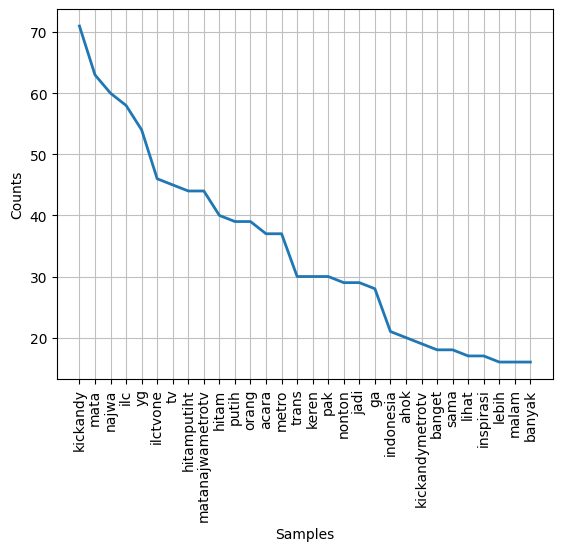

In [88]:
freq_dist.plot(30, cumulative=False)
plt.show()

### **Simpan** **dataset bersih**

In [89]:
df.to_csv('data_clean.csv', index=False)

In [90]:
data = pd.read_csv('/content/data_clean.csv')
data.head(20)

,Id,Sentiment,Text Tweet,cleaned_text,label,Text Tweet_len,punct,token,stop,stemmed
0,1,1,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang n shanijkt ke hitamputih pemenang s...,0.0,100,3.0,"['undang', 'n', 'shanijkt', 'ke', 'hitamputih'...","['undang', 'n', 'shanijkt', 'hitamputih', 'pem...","['undang', 'n', 'shanijkt', 'hitamputih', 'men..."
1,2,1,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...,0.0,65,1.5,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama...","['selamat', 'berbuka', 'puasa', 'semoga', 'ama...","['selamat', 'buka', 'puasa', 'moga', 'amal', '..."
2,3,1,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans hitam putih dia dpt penghar...,0.0,67,3.0,"['ada', 'nih', 'di', 'trans', 'hitam', 'putih'...","['nih', 'trans', 'hitam', 'putih', 'dpt', 'pen...","['nih', 'trans', 'hitam', 'putih', 'dpt', 'har..."
3,4,1,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih,0.0,38,2.6,"['selamat', 'ya', 'mas', 'adietaufan', 'masuk'...","['selamat', 'mas', 'adietaufan', 'masuk', 'hit...","['selamat', 'mas', 'adietaufan', 'masuk', 'hit..."
4,5,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans,0.0,29,0.0,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']","['asiknya', 'nonton', 'hitam', 'putih', 'trans']","['asiknya', 'nonton', 'hitam', 'putih', 'trans']"
5,6,1,@TRANS7 acara paling komplit dan menarik apala...,trans acara paling komplit dan menarik apala...,0.0,55,1.8,"['trans', 'acara', 'paling', 'komplit', 'dan',...","['trans', 'acara', 'paling', 'komplit', 'menar...","['trans', 'acara', 'paling', 'komplit', 'tarik..."
6,7,1,hitam putih T7 inspiratif banget,hitam putih t inspiratif banget,0.0,28,0.0,"['hitam', 'putih', 't', 'inspiratif', 'banget']","['hitam', 'putih', 't', 'inspiratif', 'banget']","['hitam', 'putih', 't', 'inspiratif', 'banget']"
7,8,1,Suka banget dengan acara hitam putih,suka banget dengan acara hitam putih,0.0,31,0.0,"['suka', 'banget', 'dengan', 'acara', 'hitam',...","['suka', 'banget', 'acara', 'hitam', 'putih']","['suka', 'banget', 'acara', 'hitam', 'putih']"
8,9,1,Keren lu bro #HitamPutihTrans7,keren lu bro hitamputihtrans,0.0,27,3.7,"['keren', 'lu', 'bro', 'hitamputihtrans']","['keren', 'lu', 'bro', 'hitamputihtrans']","['keren', 'lu', 'bro', 'hitamputihtrans']"
9,10,1,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",tadi ada yg liat hitam putih di trans ga ada...,0.0,50,2.0,"['tadi', 'ada', 'yg', 'liat', 'hitam', 'putih'...","['tadi', 'yg', 'liat', 'hitam', 'putih', 'tran...","['tadi', 'yg', 'liat', 'hitam', 'putih', 'tran..."


In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
df = pd.read_csv('/content/data_clean.csv')

**TF-IDF**

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df['stemmed']
y = df['Sentiment']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.85      0.76      0.80        37

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80

[[38  5]
 [ 9 28]]


**Algoritma : Multinomial Naive Bayes**

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.83      0.92      0.87        37

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80

[[36  7]
 [ 3 34]]


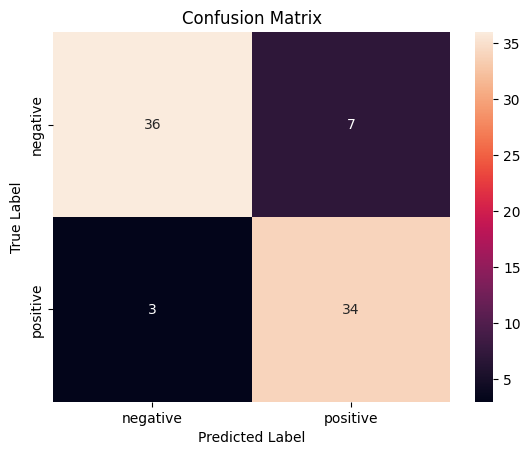

In [100]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_nb), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Algoritma: Support Vector Machine (SVM)**

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        43
           1       0.90      0.73      0.81        37

    accuracy                           0.84        80
   macro avg       0.85      0.83      0.83        80
weighted avg       0.85      0.84      0.84        80

[[40  3]
 [10 27]]


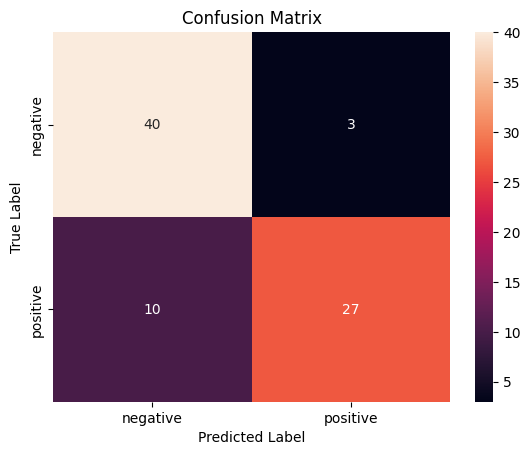

In [102]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Algoritma: Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        43
           1       0.76      0.76      0.76        37

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80

[[34  9]
 [ 9 28]]


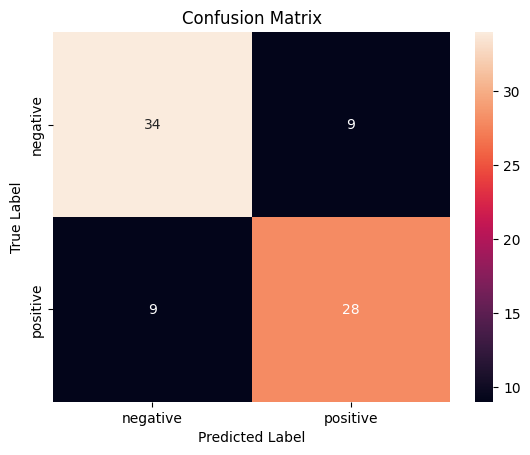

In [106]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Algoritma: K-Nearest Neighbor (KNN)**

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        43
           1       0.75      0.81      0.78        37

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80

[[33 10]
 [ 7 30]]


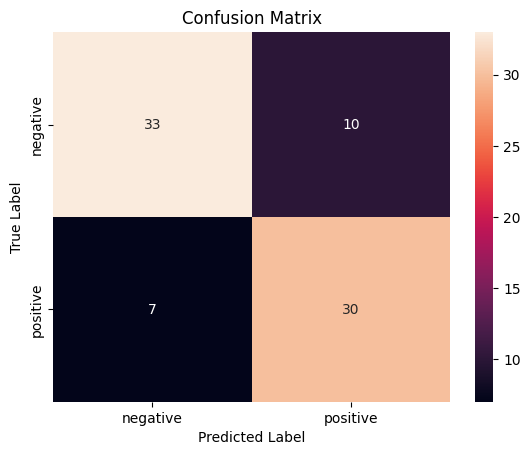

In [104]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
